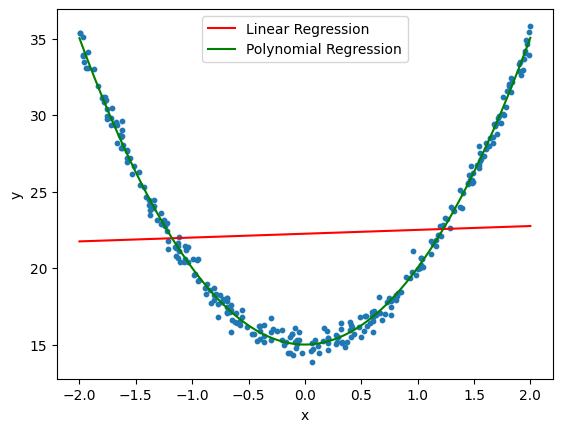

In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Generate random data
x = 4 * np.random.rand(300, 1) - 2
y = 5 * x**2 + 15 + np.random.randn(300, 1) * 0.5

# Linear regression
reg = LinearRegression()
reg.fit(x, y)
x_fit = np.linspace(-2, 2, 300).reshape(-1, 1)
y_pred = reg.predict(x_fit)

# Polynomial regression
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
reg_poly = LinearRegression()
reg_poly.fit(x_poly, y)
x_fit_poly = polynomial_features.transform(x_fit)
y_poly_predict = reg_poly.predict(x_fit_poly)


# Plotting
plt.scatter(x, y, s=10)
plt.plot(x_fit, y_pred, color="r", label='Linear Regression')
plt.plot(x_fit, y_poly_predict, color="g", label='Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Test RMSE: 1.0141729537671254


/home/yash/.local/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


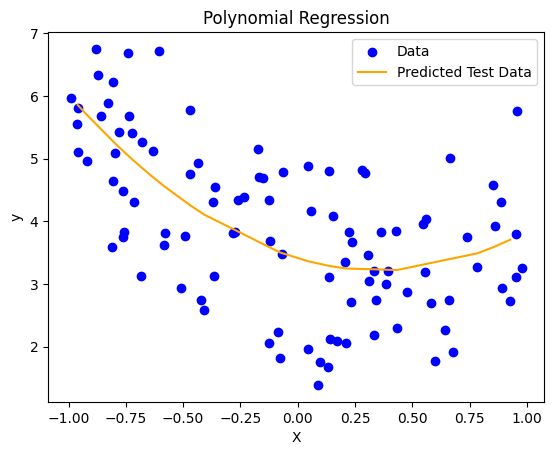

(100, 1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1) - 1  # Generate 100 random values between -1 and 1
y = 2 * X**2 - X + 3 + np.random.randn(100, 1)  # Quadratic function with noise

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit polynomial regression model
degree = 2  # Degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predict
y_test_pred = model.predict(X_poly_test)

test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
print("Test RMSE:", test_rmse)

# Sort X_test and y_test_pred based on X_test values
sorted_indices = np.argsort(X_test[:, 0])
X_test_sorted = X_test[sorted_indices]
y_test_pred_sorted = y_test_pred[sorted_indices]

# Plot results
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_test_sorted, y_test_pred_sorted, color='orange', label='Predicted Test Data')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
